In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
def find_theta_av(N, theta, x, L, r):
    r_vec = x[None, :] - x[:, None]
    r_vec = r_vec - np.rint(r_vec / L) * L
    r_abs = np.linalg.norm(r_vec, axis=2)

    av_neighbour_theta = np.array([np.mean(theta[r_abs[i, :] < r]) for i in range(N)])
    av_neighbour_theta[np.isnan(av_neighbour_theta)] = 0
  
    return av_neighbour_theta

def simulate(N, steps, dt, L, v_abs, r, eta):
    #   System variables
    x = np.zeros(shape=(steps, N, 2))
    theta = np.zeros(shape=(steps, N))
    v = np.zeros(shape=(steps, N, 2))

    #   Initialize 
    x[0, :, :] = np.random.uniform(0, L, size=(N, 2))
    theta[0, :] = np.random.uniform(-np.pi, np.pi, size=(N))
    v[0, :, 0] = v_abs * np.cos(theta[0, :])
    v[0, :, 1] = v_abs * np.sin(theta[0, :])  
    
    for i in range(steps-1):
        av_neighbour_theta = find_theta_av(N, theta[i, :], x[i,:], L, r)
        theta[i + 1, :] = av_neighbour_theta + np.random.uniform(-eta, eta, size=(N)) 
        v[i+1, :, 0] = v_abs * np.cos(theta[i, :])
        v[i+1, :, 1] = v_abs * np.sin(theta[i, :])  
        x[i+1, :, :] = np.mod(x[i, :, :] +  v[i+1, :, :] * dt, L)

    return x, v, theta

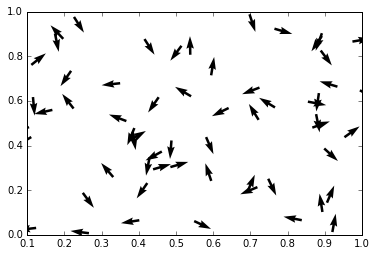

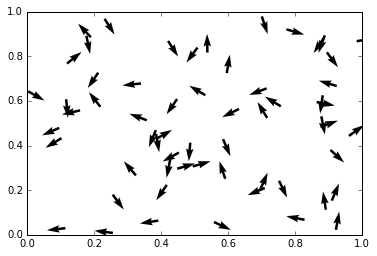

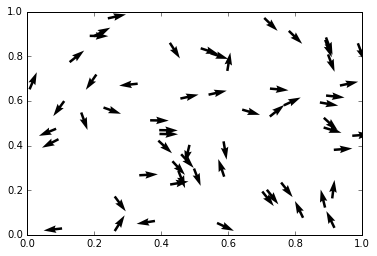

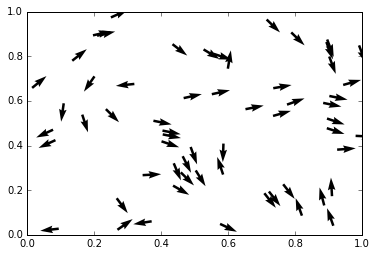

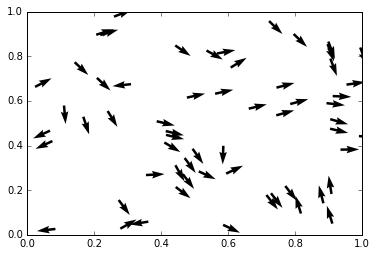

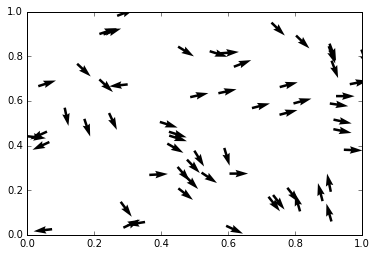

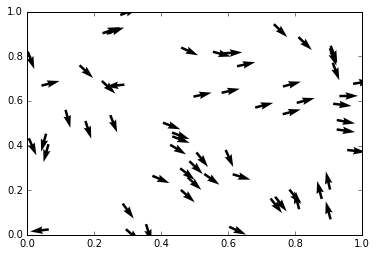

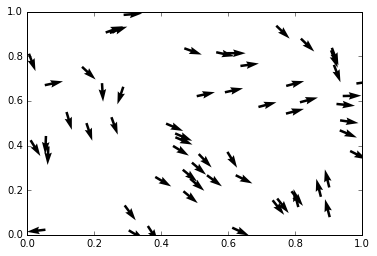

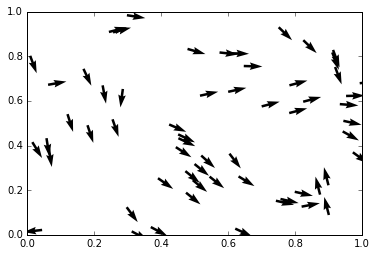

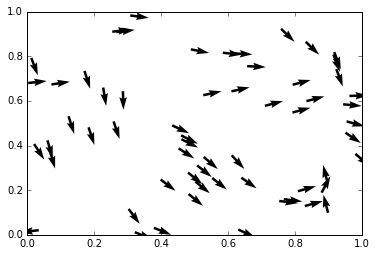

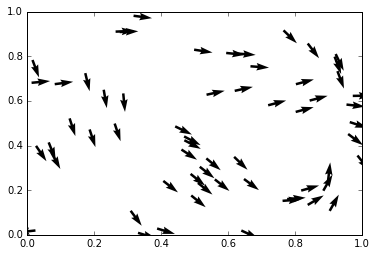

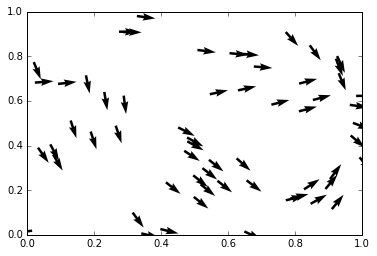

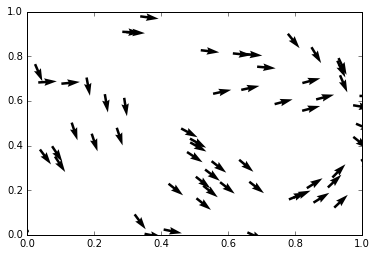

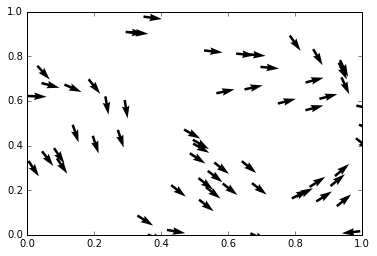

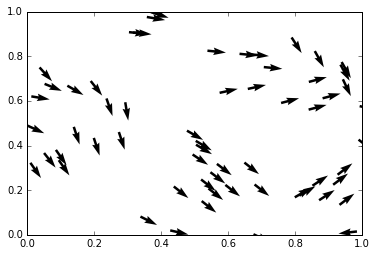

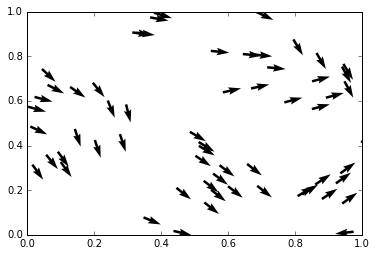

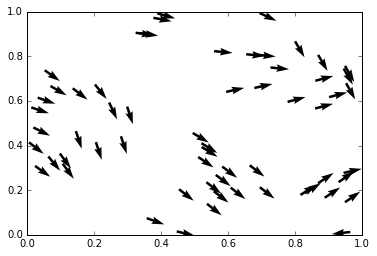

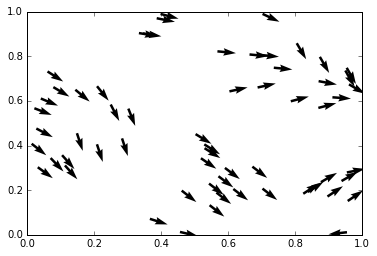

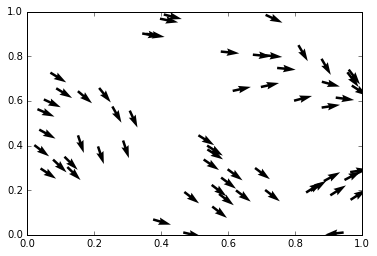

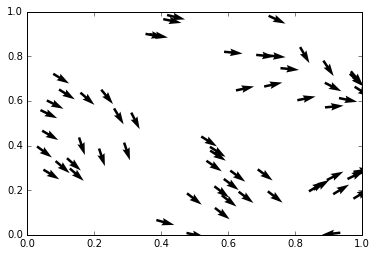

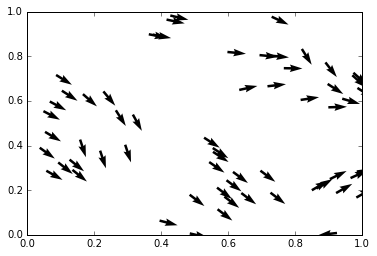

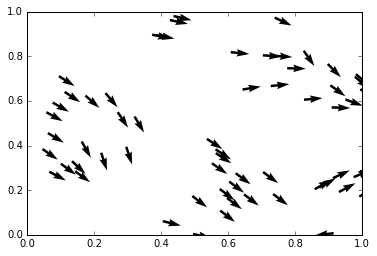

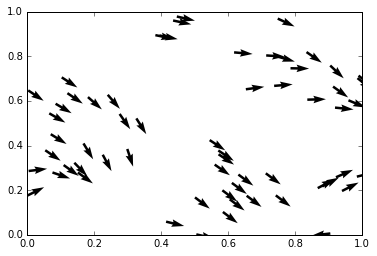

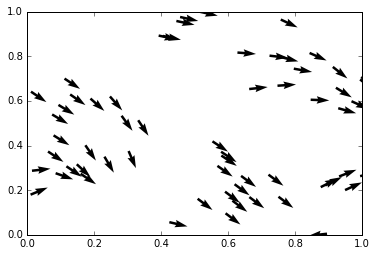

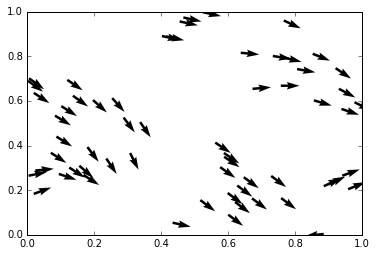

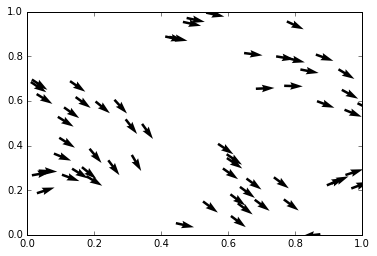

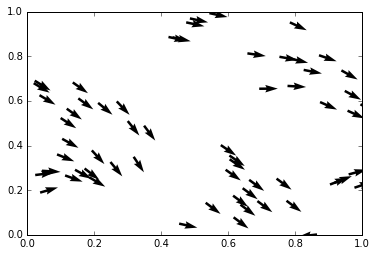

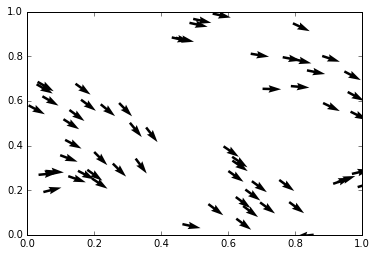

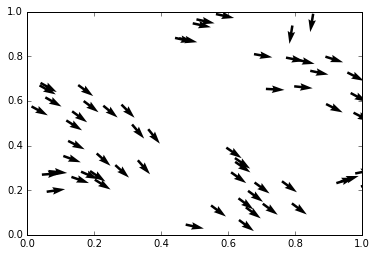

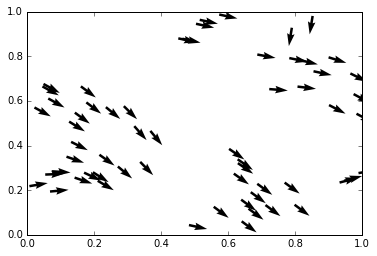

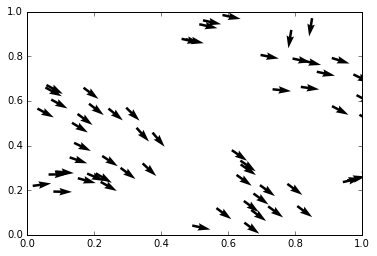

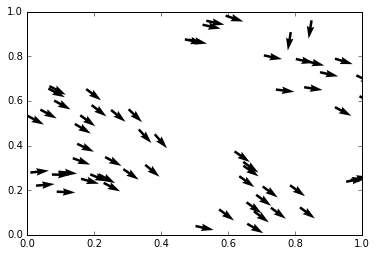

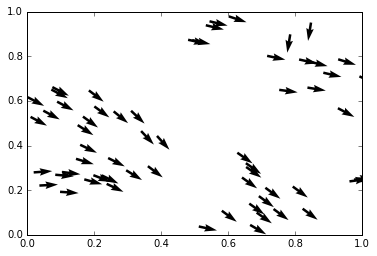

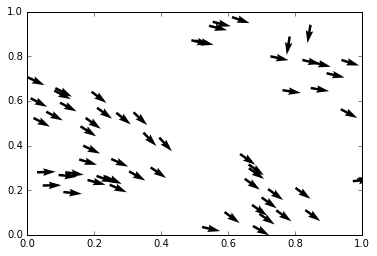

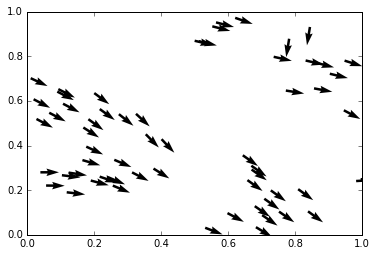

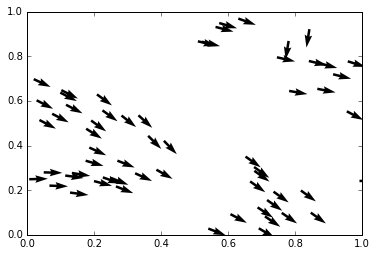

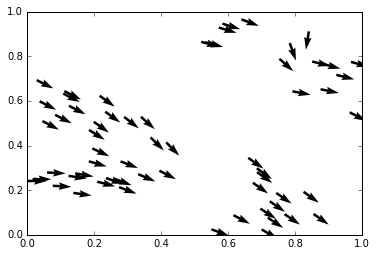

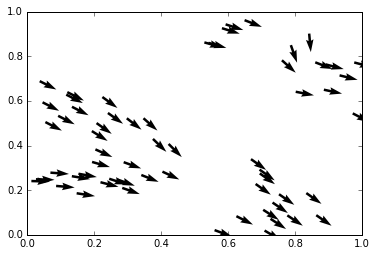

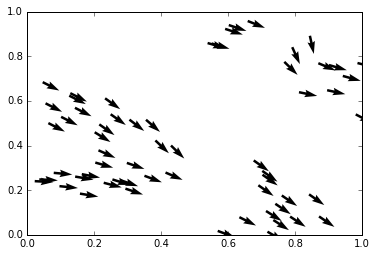

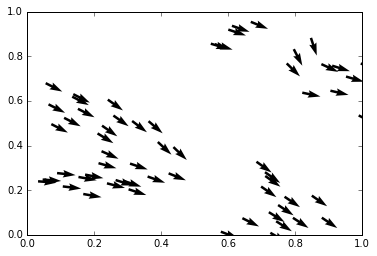

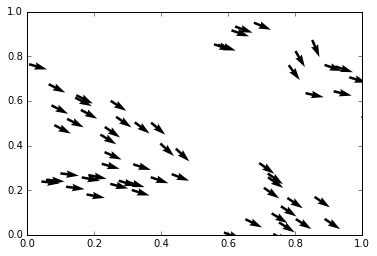

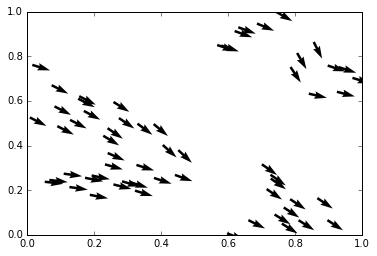

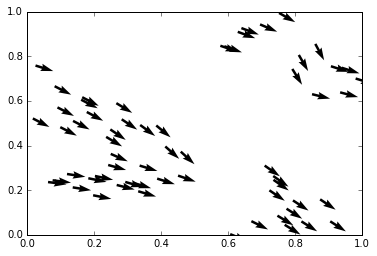

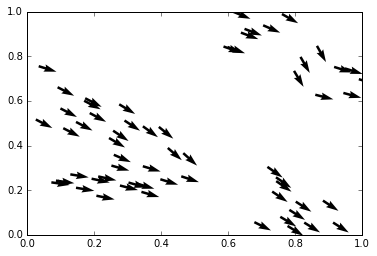

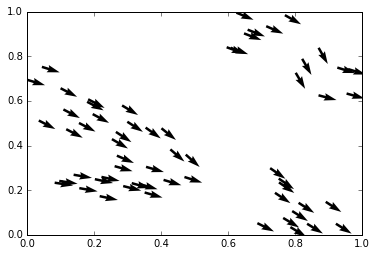

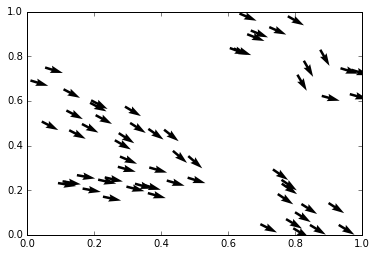

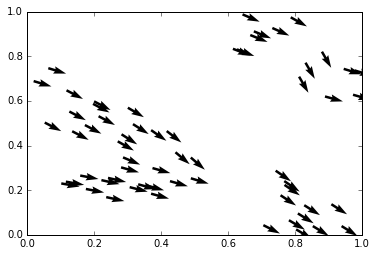

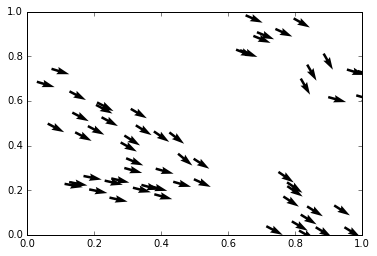

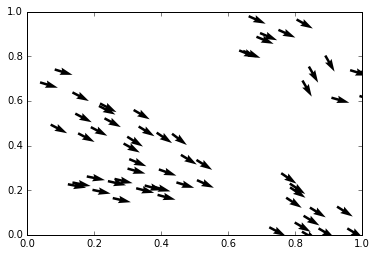

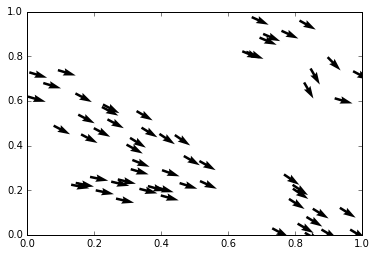

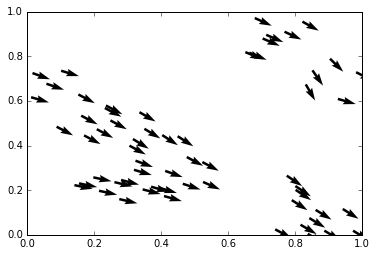

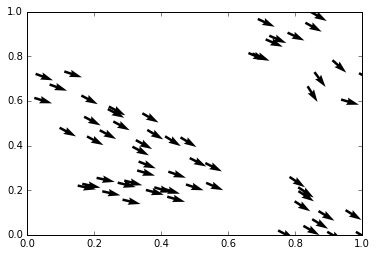

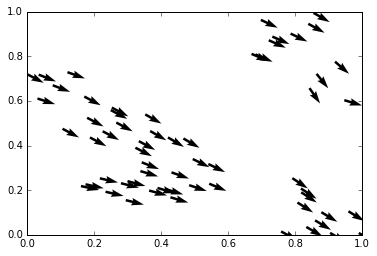

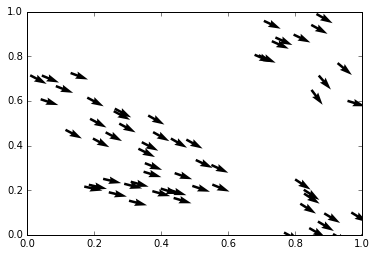

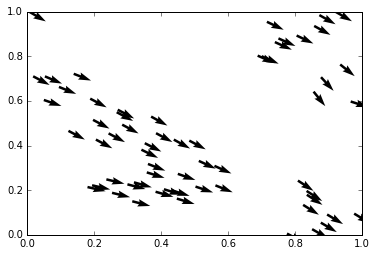

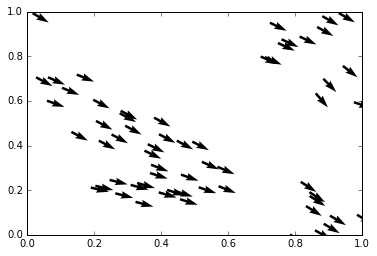

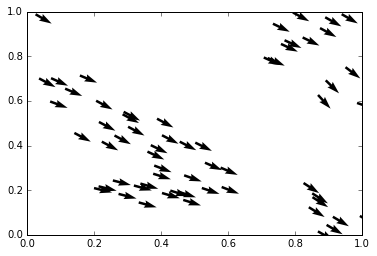

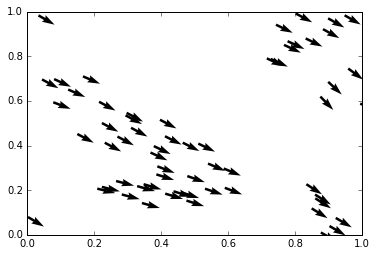

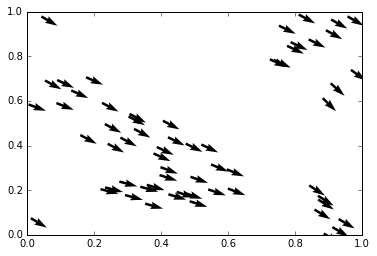

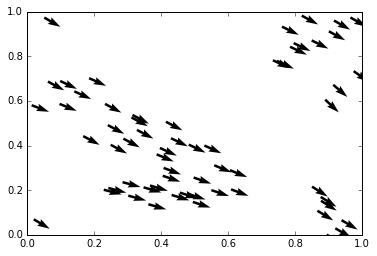

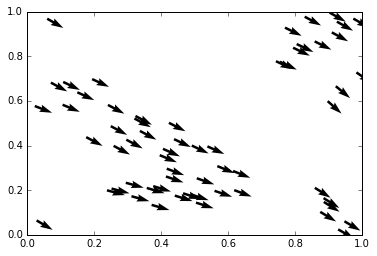

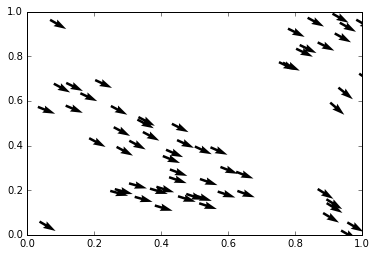

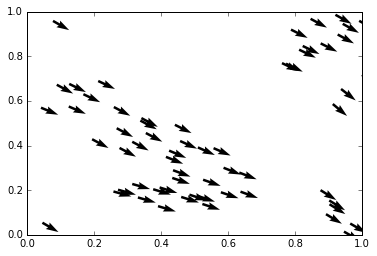

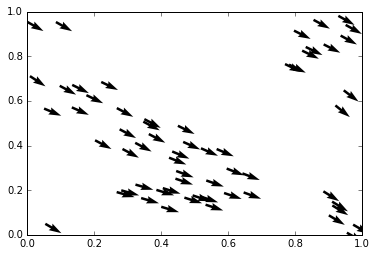

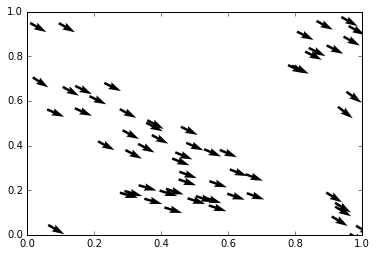

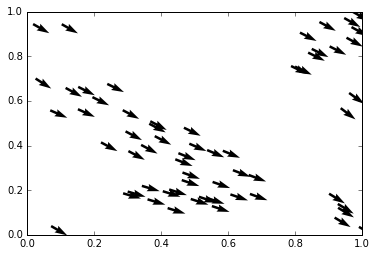

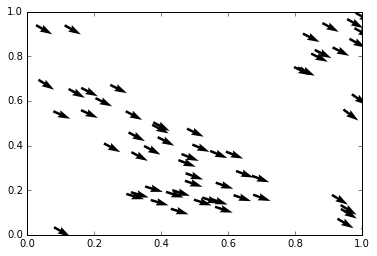

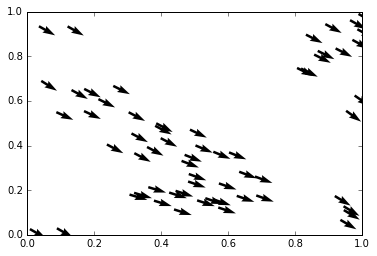

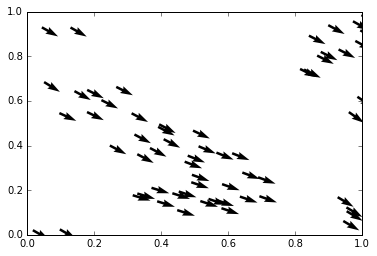

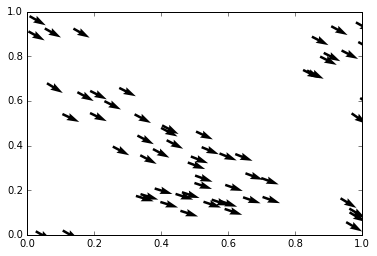

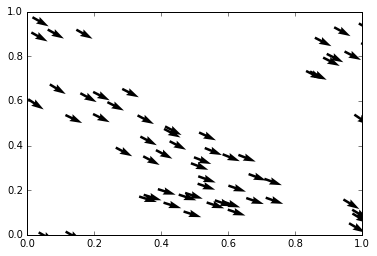

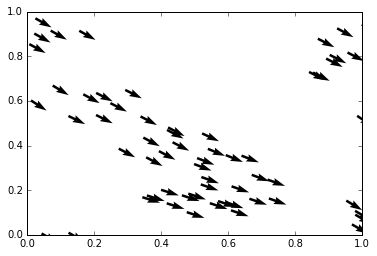

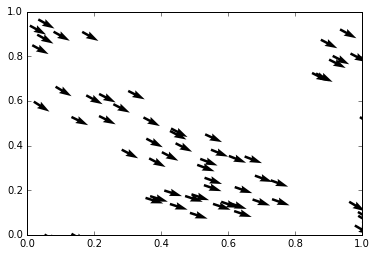

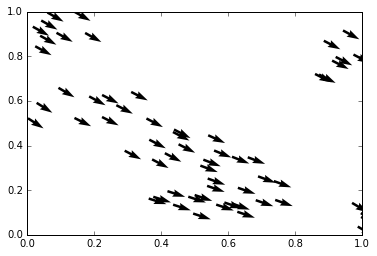

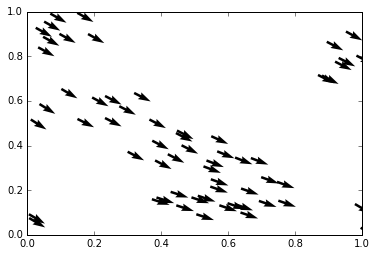

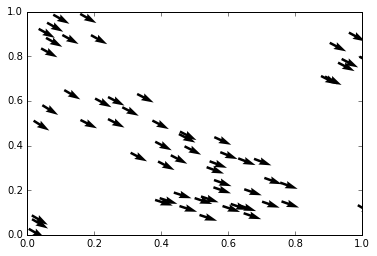

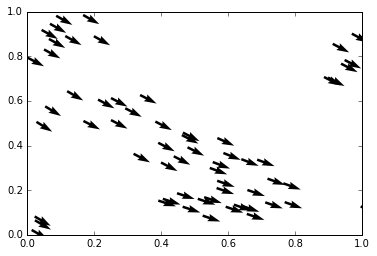

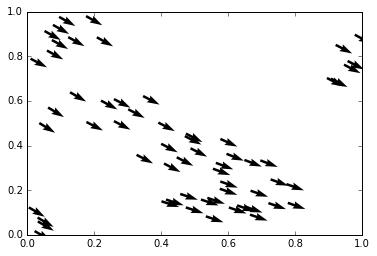

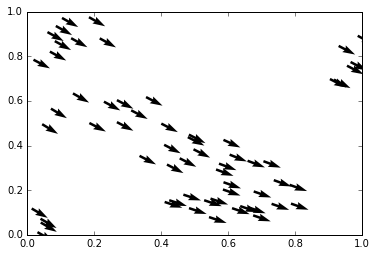

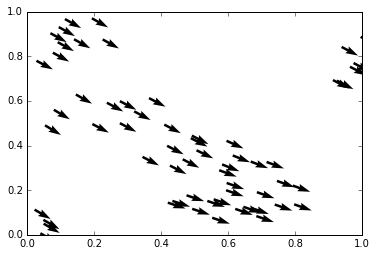

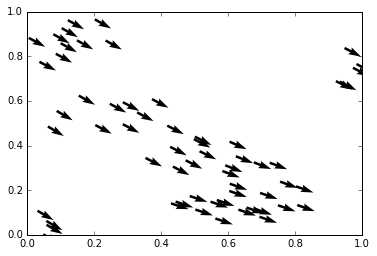

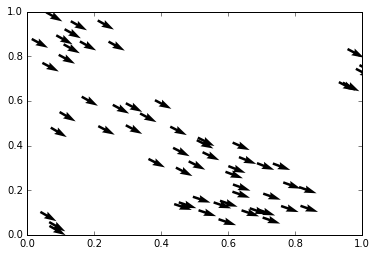

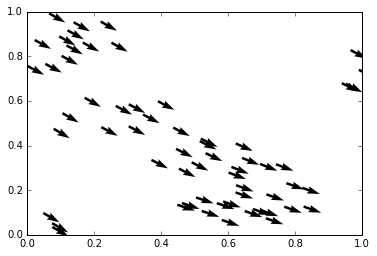

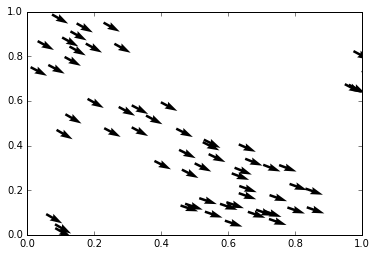

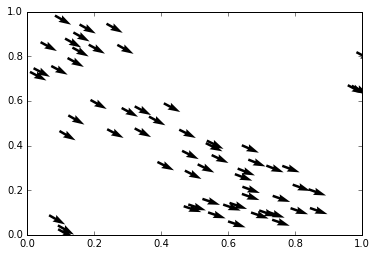

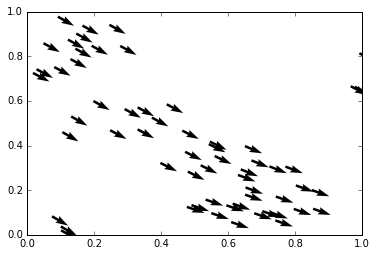

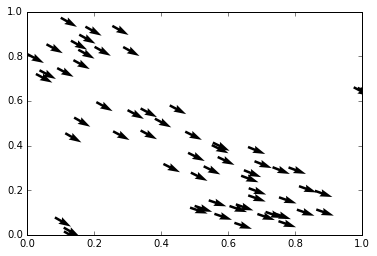

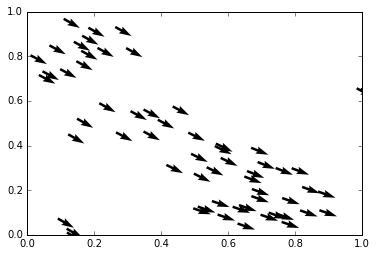

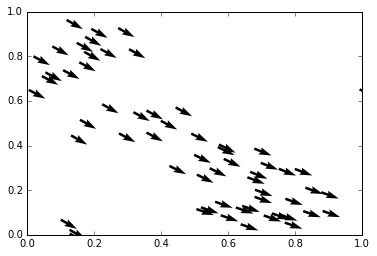

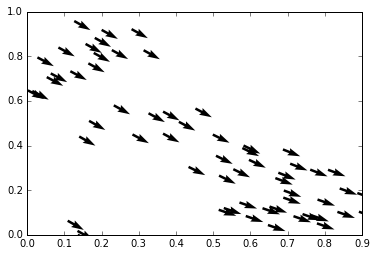

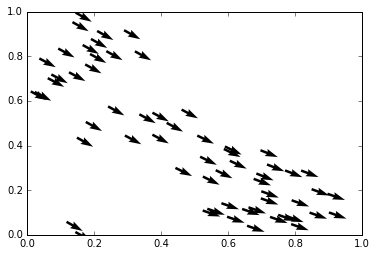

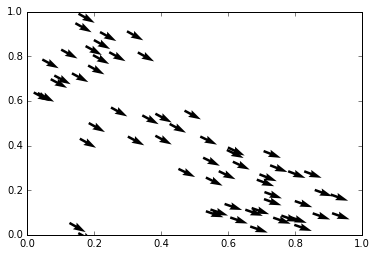

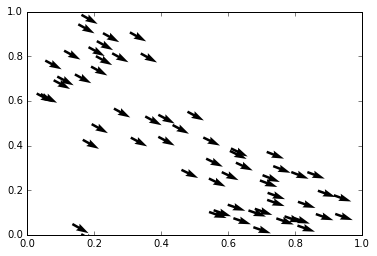

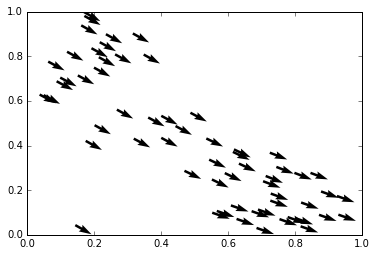

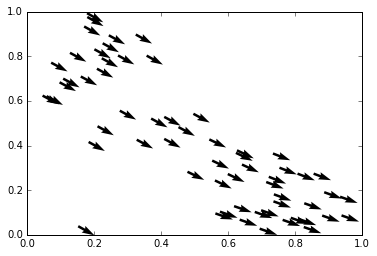

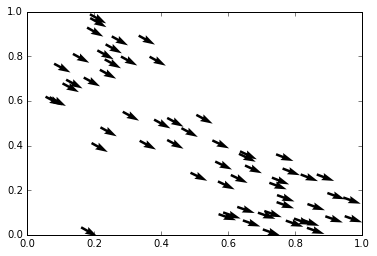

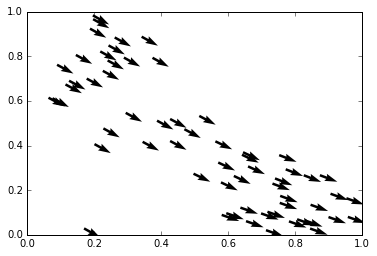

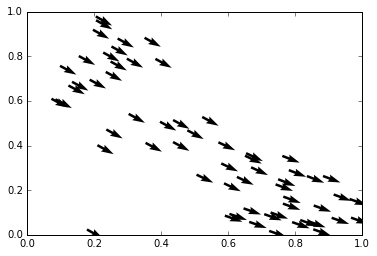

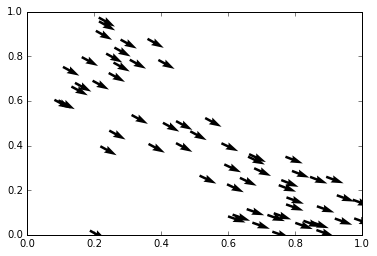

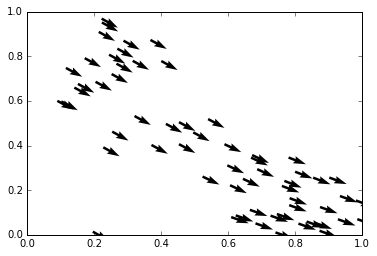

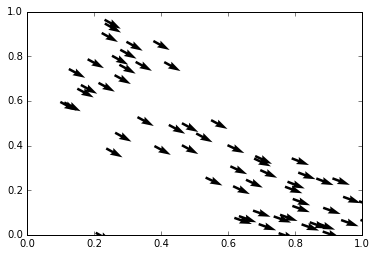

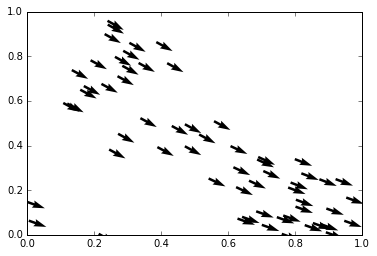

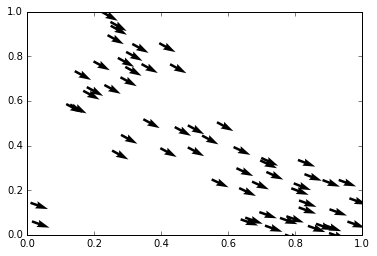

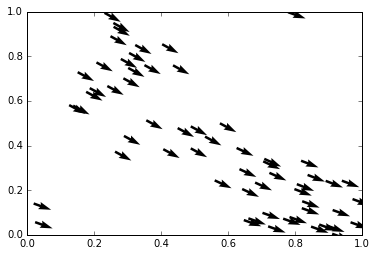

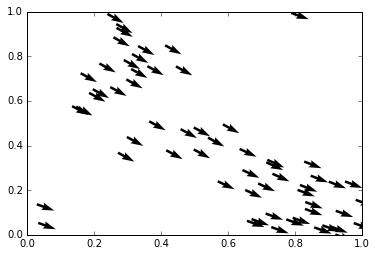

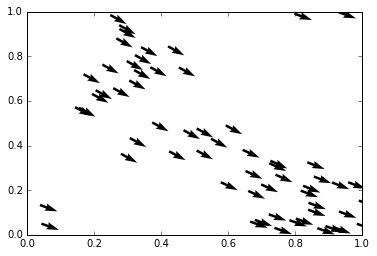

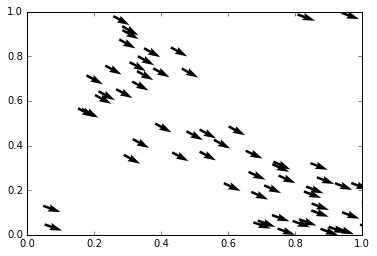

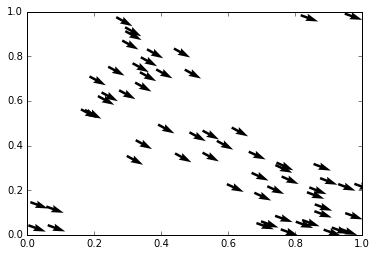

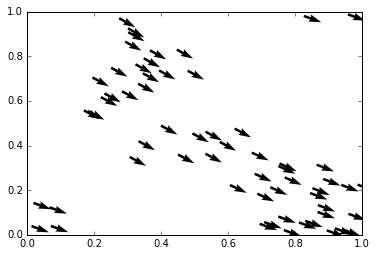

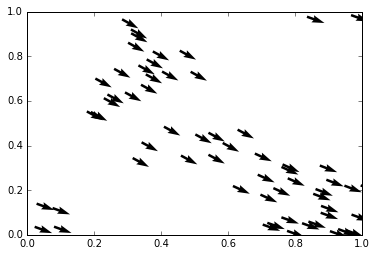

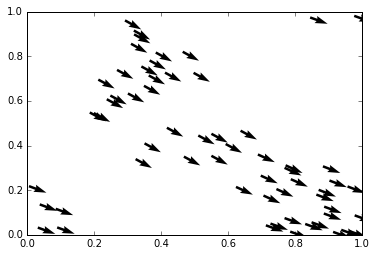

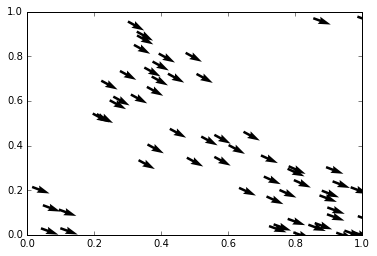

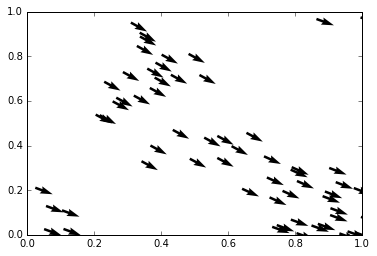

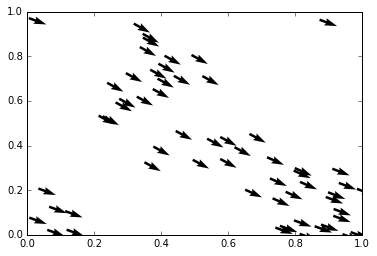

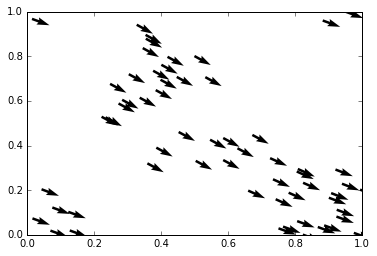

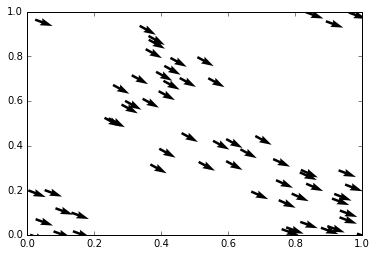

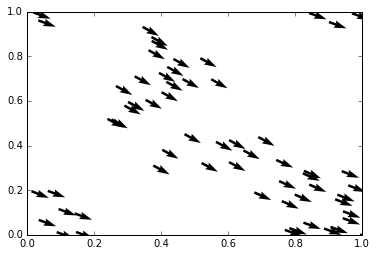

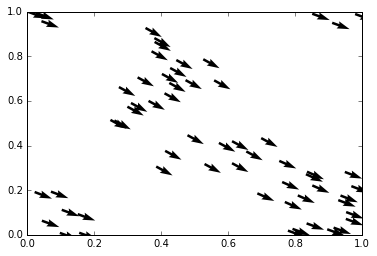

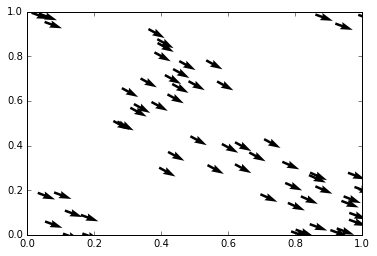

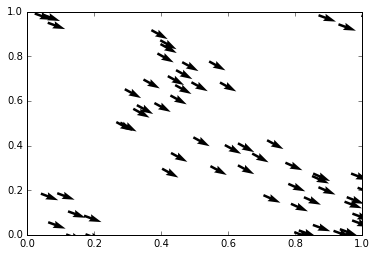

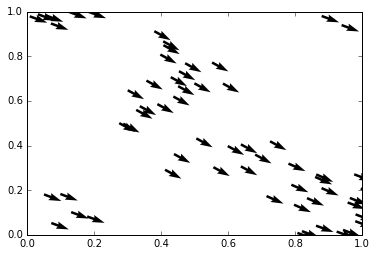

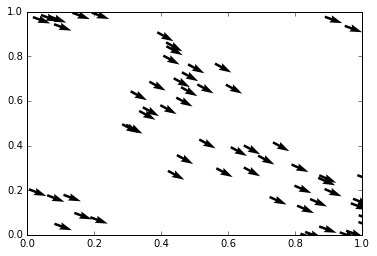

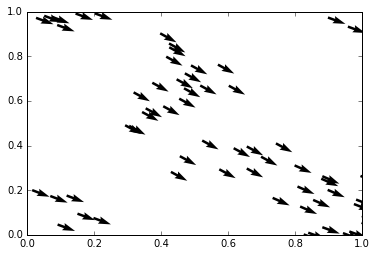

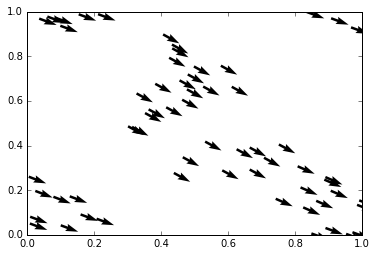

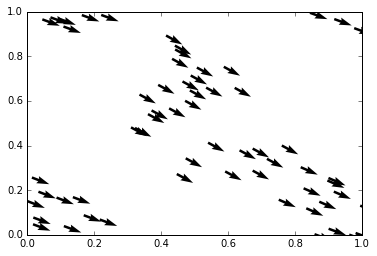

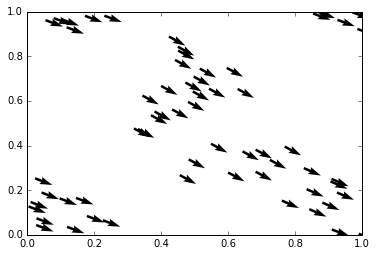

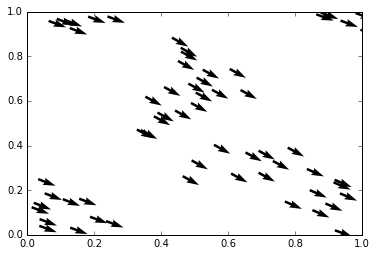

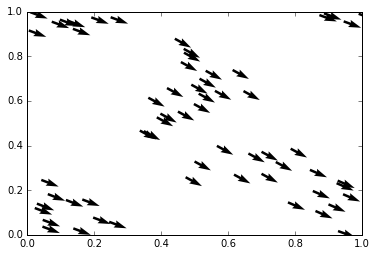

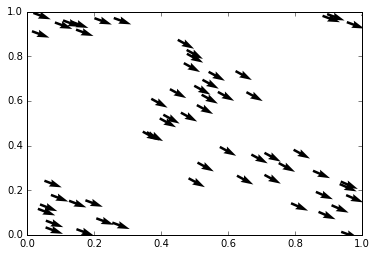

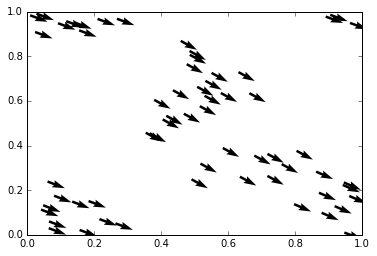

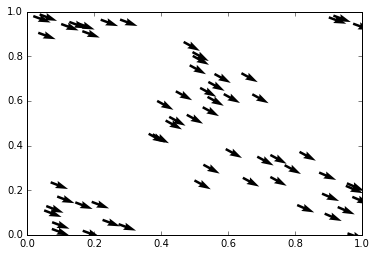

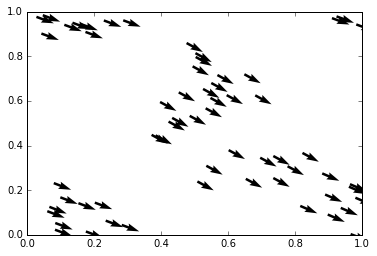

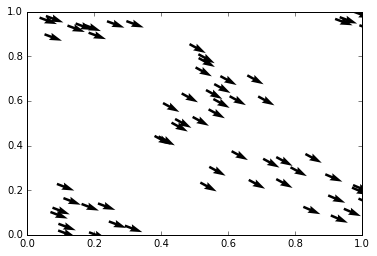

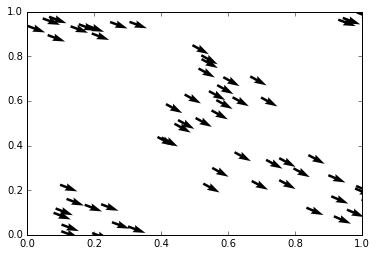

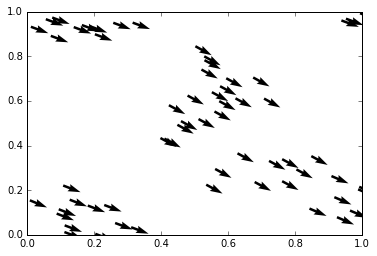

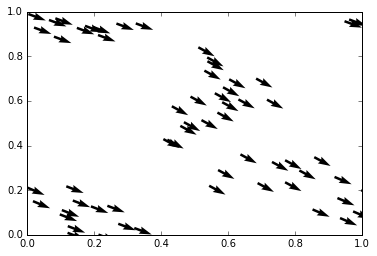

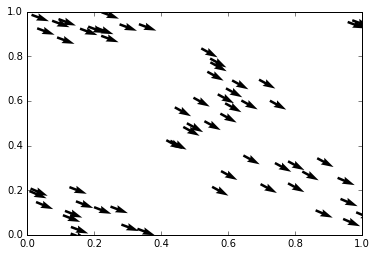

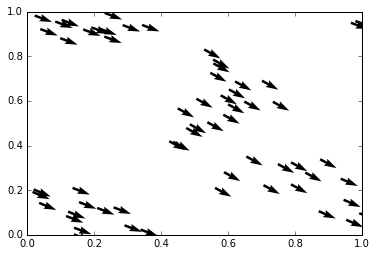

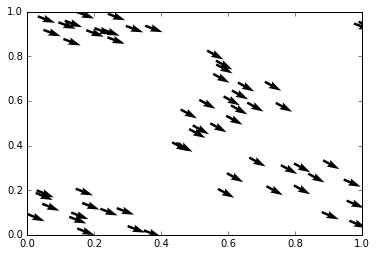

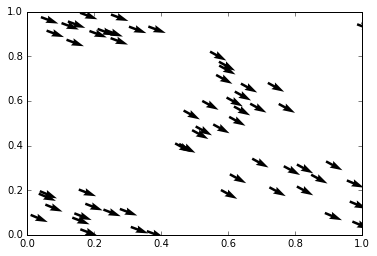

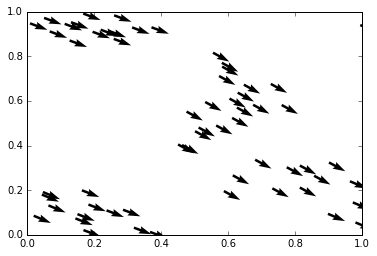

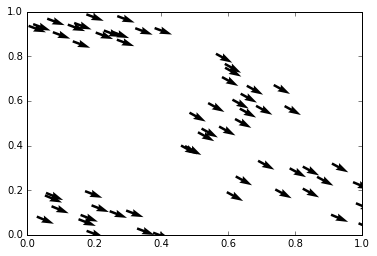

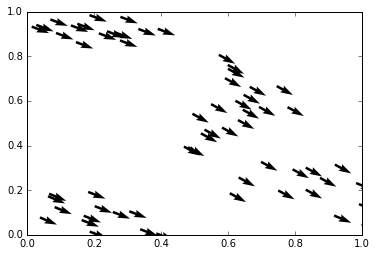

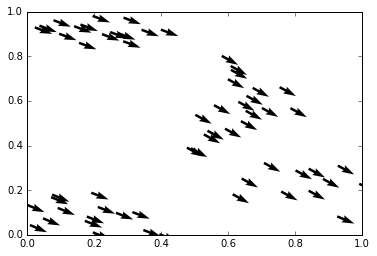

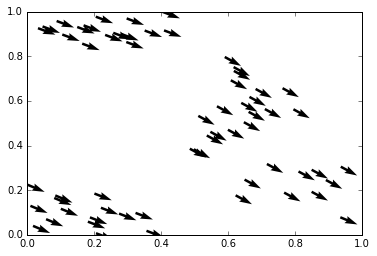

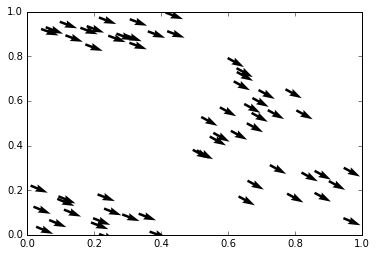

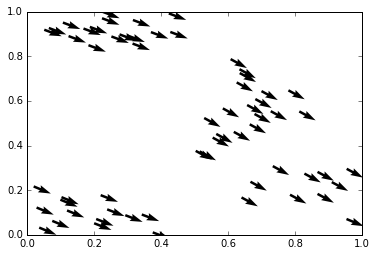

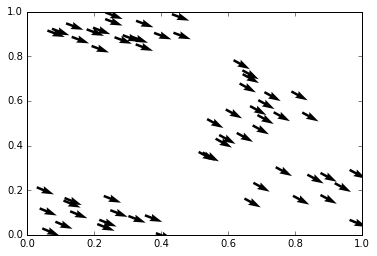

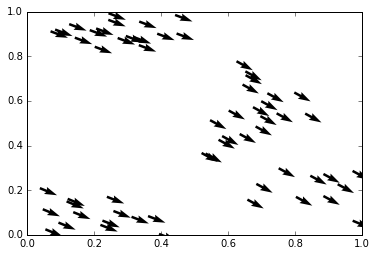

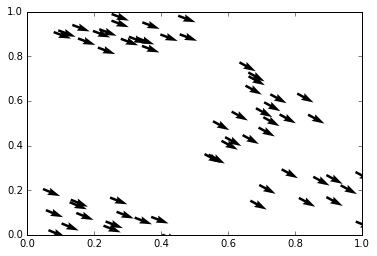

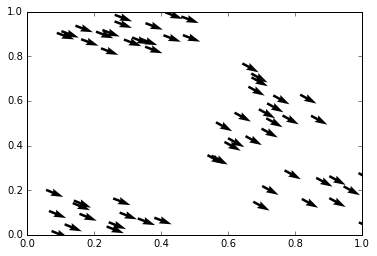

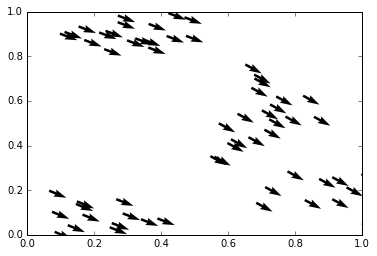

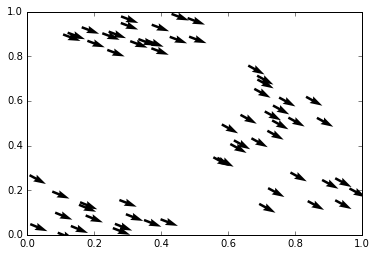

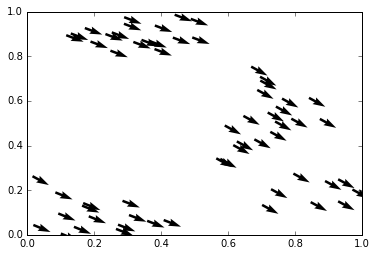

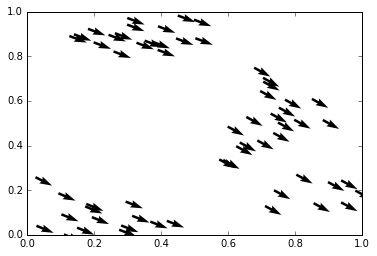

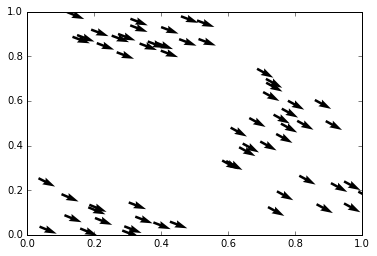

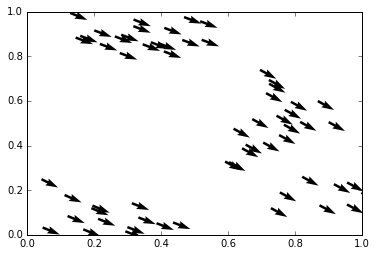

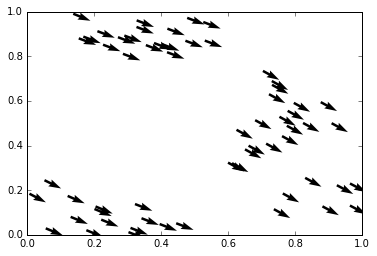

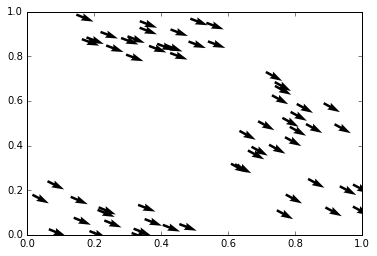

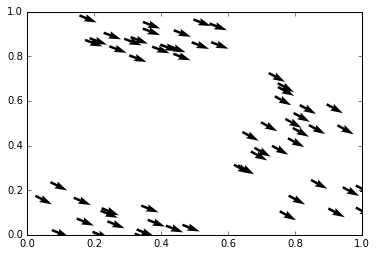

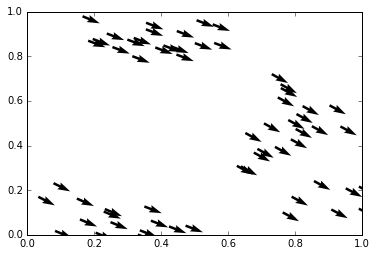

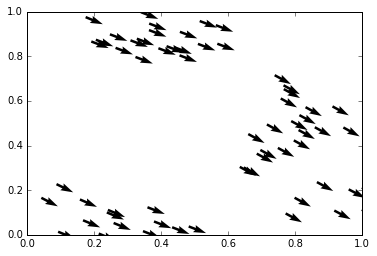

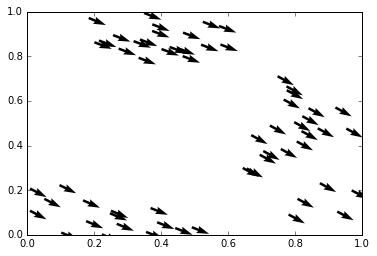

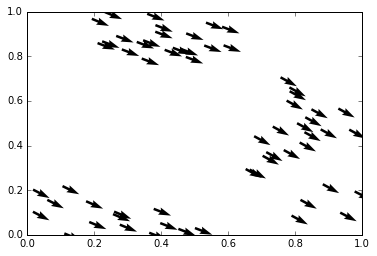

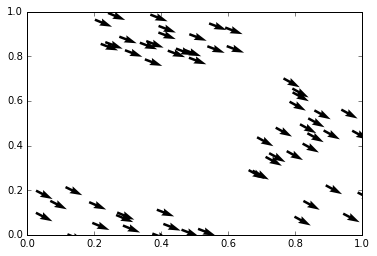

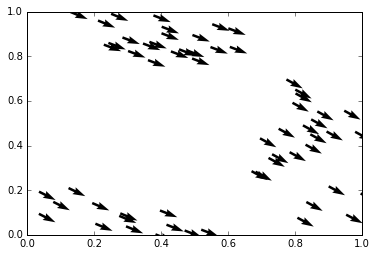

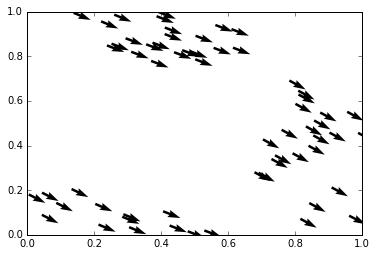

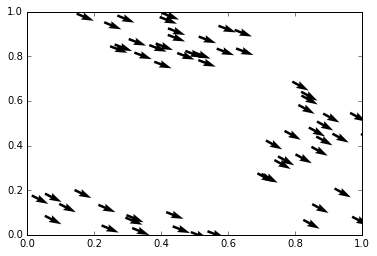

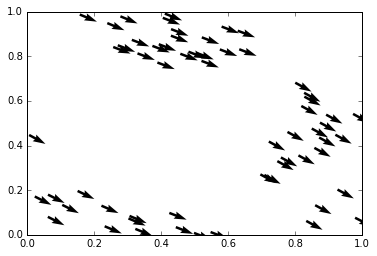

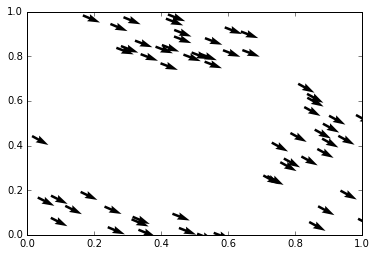

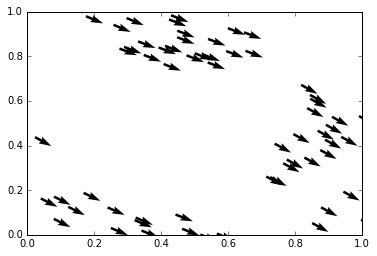

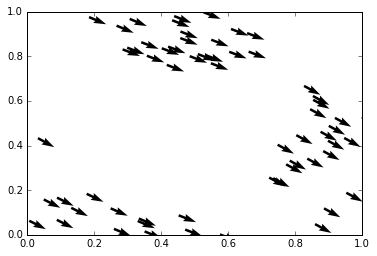

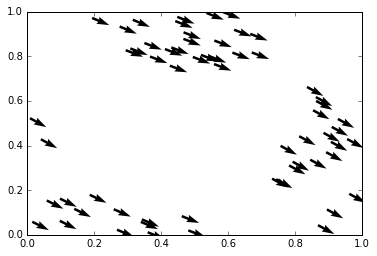

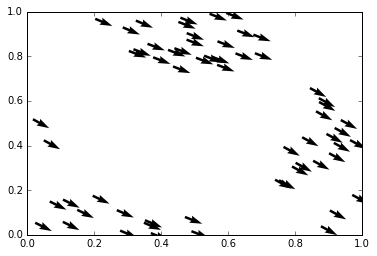

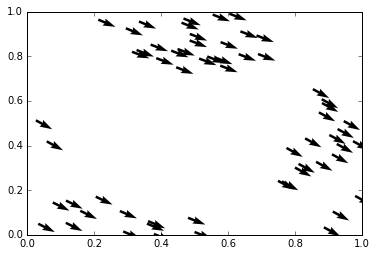

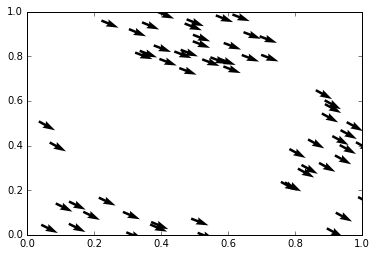

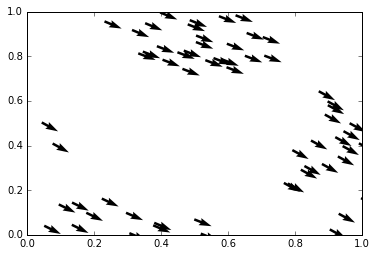

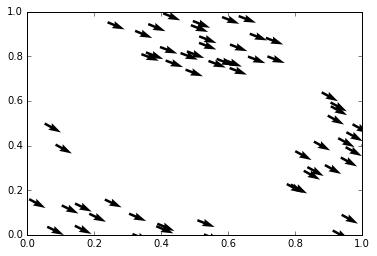

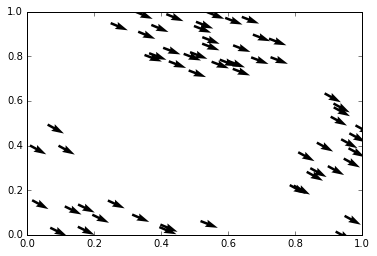

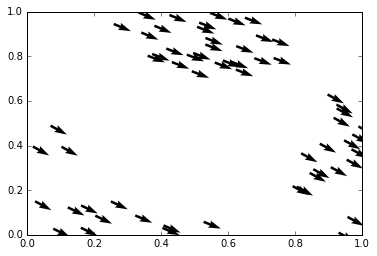

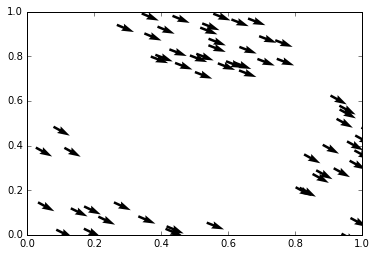

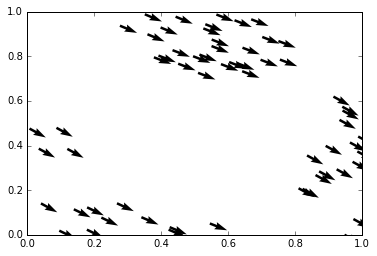

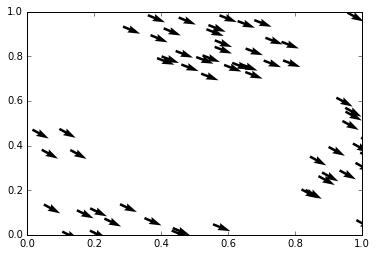

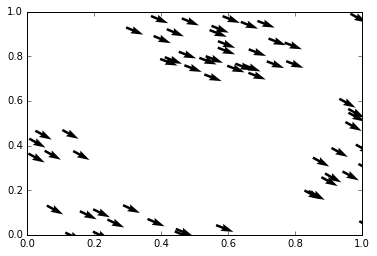

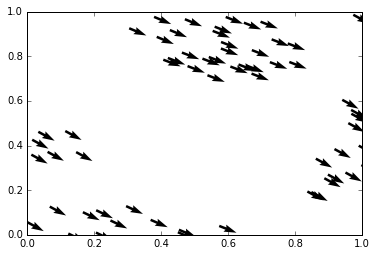

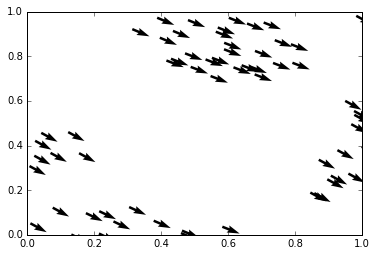

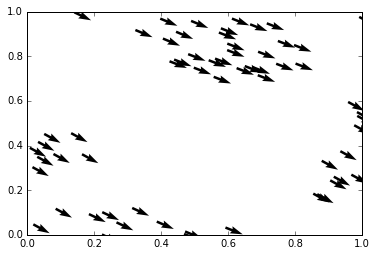

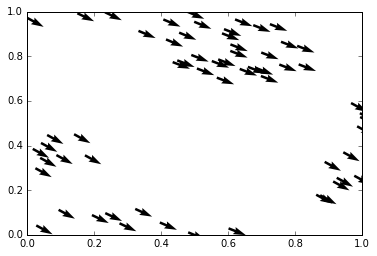

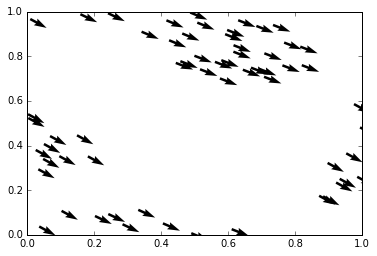

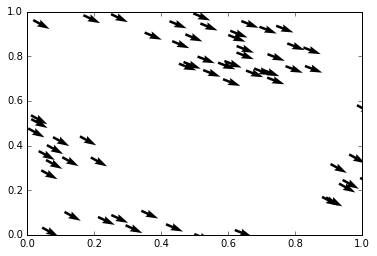

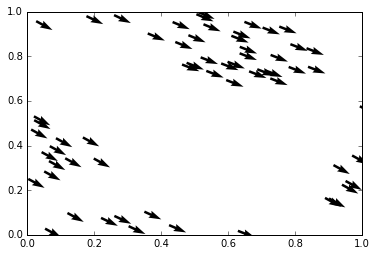

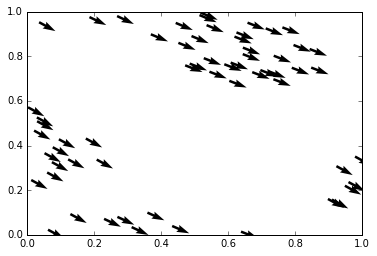

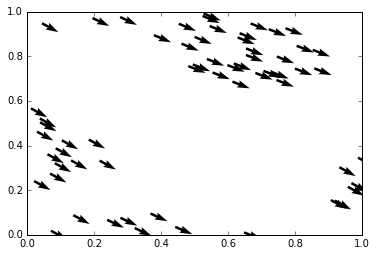

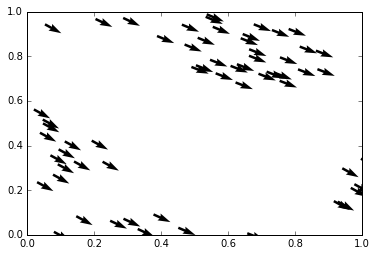

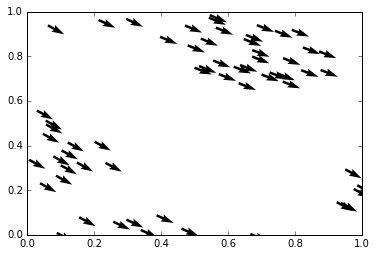

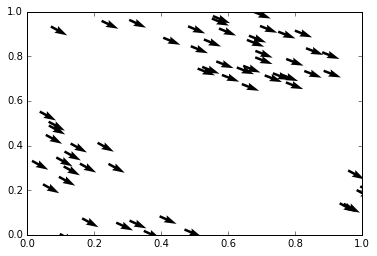

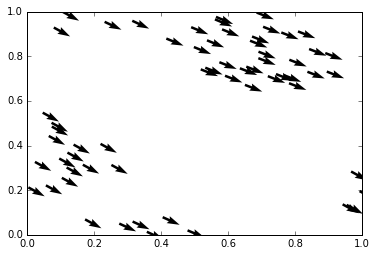

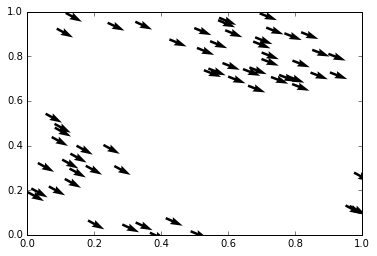

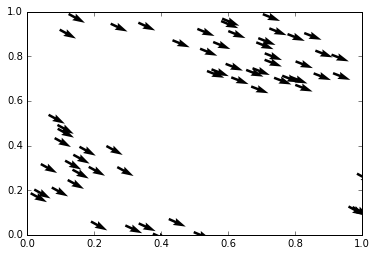

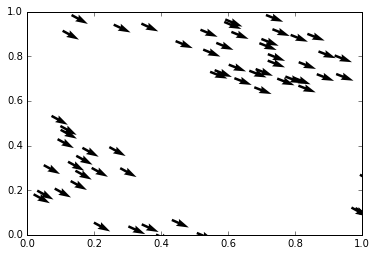

In [26]:
order_param = []

N = 60
steps = 200
dt = 0.1
L = 1
v_abs = 0.1
r = 0.1
eta = 0
    
x, v, theta = simulate(N, steps, dt, L, v_abs, r, eta)

for i in range(steps):
    plt.quiver(x[i, :, 0], x[i, :, 1], v[i, :, 0], v[i, :, 1])
    plt.show()
    
# order_param.append(np.mean(np.linalg.norm(np.mean(v, axis=1), axis=1))/(v_abs))